# STATS 503, Group Work Assignment 2: Bias, Variance, and Irreducible Error

This lab-initiated groupwork assignment is designed to provide a foundational understanding of bias, variance, and irreducible error, which are key to many machine learning endeavors. Upon completing this assignment, you'll have a practical understanding essential for diagnosing model performance. This knowledge is foundational, forming the basis for more advanced learning in the field of machine learning.

**Instructions:** For the first 20 minutes of lab section, the GSI will recap the concepts of bias, variance, and irreducible. During the following 60 minutes of lab section, and afterward as necessary, you will collaborate in two-person teams (assigned by the GSI) to complete the group work tasks below. The GSI will help individual teams encountering difficulty, make announcements addressing common issues, and help ensure progress for all teams. **During lab, feel free to flag down your GSI to ask questions at any point!** Upon completion, one member of the team should submit their team's work through Canvas as html.


### Helpful Resources for this Subject

- [B-V Tradeoff Full Explanation and Video Animation](https://youtu.be/FcXQKsZKRUs?t=46)
- [Cool animation-explanation of bias-variance tradeoff](https://mlu-explain.github.io/bias-variance/)
- [(Advanced) Derivation of bias-variance decomposition](https://web.archive.org/web/20140821063842/http://ttic.uchicago.edu/~gregory/courses/wis-ml2012/lectures/biasVarDecom.pdf) and [another equivalent derivation with video lecture](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html)

## Recap of Bias, Variance, and Irreducible Error

The bias-variance decomposition of the **test** mean squared error is [(ISLR page 34 Eq. (2.7))](https://www.stat.berkeley.edu/users/rabbee/s154/ISLR_First_Printing.pdf):

$$
\mathrm{E[(y_0 - \hat{f}(x_0))^2]} = [\mathrm{Bias(\hat{f}(x_0))}]^2 + \mathrm{Var(\hat{f}(x_0))} + \mathrm{Var}(\epsilon)
$$

We will explore the terms in this decomposition one by one.

### Bias

Refers to the error that originates from the assumptions of your model that are often too simple to capture all the underlying patterns in the data. The model's inability to capture more complex interactions in data leads to systematic error in prediction. Mathematically, for $x_0$ given

$$
\mathrm{Bias(\hat{f}(x_0))^2} = (E[\hat{f}(x_0)] - f(x_0))^2.
$$

That is, the **bias measures the difference between the mean estimate and the truth**. Let's explore this with an example.

Let's think about the true model as taking the following shape
$$
X \sim U(-5,5),\\
Y|X \sim \mathcal{N}(X^2, 1).
$$
In practice, we do not know the true function, and we are left to guess it. For our first example, we will attempt to model this relationship using a linear regression model, which immediately assumes a sprecific -wrong!- relationship between $X$ and $Y$. For illustration purposes, we will pay special attention to the element $x_0=0$.

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

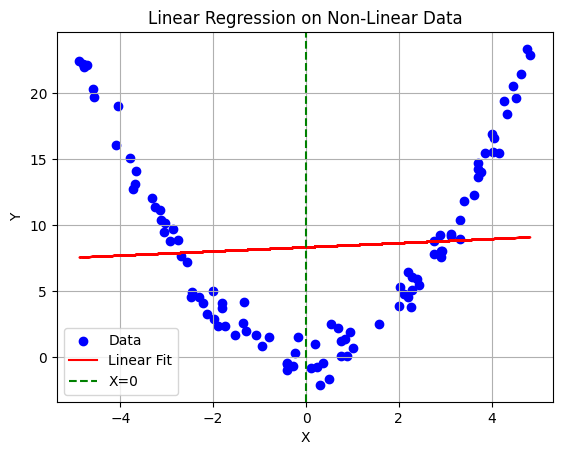

In [96]:
# Set seed for reproducibility
#np.random.seed(0)

# Generate 100 samples of X uniformly from [0, 1]
X = np.random.uniform(-5, 5, 100) # Sample from Uniform distribution
Y = X**2 + np.random.normal(0, 1, 100)  # Y is a parabola of X with added noise

# Create DataFrame
data = pd.DataFrame({
    'X': X,
    'Y': Y
})

# Reshape X for sklearn
X_reshaped = data['X'].values.reshape(-1, 1)

# Fit a linear model
model = LinearRegression()
model.fit(X_reshaped, data['Y'])

# Predictions
data['Y_pred'] = model.predict(X_reshaped)

# Plot
plt.scatter(data['X'], data['Y'], color='blue', label='Data')
plt.plot(data['X'], data['Y_pred'], color='red', label='Linear Fit')
plt.axvline(x=0, color='green', linestyle='--', label='X=0')
# Adding a grid
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Non-Linear Data')
plt.legend()
plt.show()

# **Task 1 (15 points)**

<u>Scenario</u>: Suppose you showed your boss the bias and variance of the linear regression on your simulated quadratic data. Your boss is terrible and used ChatGPT to summarize your Jupyter notebook. He responds to your work saying "Linear regression is still probably fine. The bias is high only for the single point tested." **Throughout this lab**, we will show that this is false, because a line intersects a quadratic regression function at most twice. In all other regions, there will be a reasonably high distance between the linear regression and true regression curves. But, we need to fully demonstrate linear regression's abysmal performance on this data. <u>Note that Task 1 questions will be presented in chunks as you go through the lab content.</u>


--------------------------------------------------------------------------------

### Question 1.1 (1 point)

Implement the true, noiseless, signal function we used in the lab demo above. The data generating process introduces noise, but in synthetic experiments, we frequently have access to the ground truth.

In [97]:
def signal(x):
  return x**2

In [99]:
assert signal(-2) == 4
assert signal(0) == 0
assert signal(2) == 4

### Question 1.2 (1 point)

That was... too simple. But, this is actually decent code design. In your own words, why do you think we had you create a separate python function even when the operation was simple? **(You could get asked this in an inteview)**

- Functions can be reused in different contexts
- Functions can be tested independently
- And functions make codes more easily to understand and maintain.

### Question 1.3 (1 point)

We also need to make the data generating process its own function. Write a function that samples the noisy data **that utilizes your signal function from Part 1**. You may assume that the noise follows a standard normal distribution $\mathcal{N}(0,1)$.

In [100]:
def dgp(x):
  ### IMPLEMENT HERE
  return signal(x)+np.random.normal(0,1)

(YOUR ANSWER HERE)

--------------------------------------------------------------------------------

Consequently, the discrepancy between the true relationship and our assumption will be a source of bias; the linear model's inability to capture the curvature of the quadratic relationship will result, practically, in systematic errors in prediction.

Let's repeat the above experiment multiple times. You can fiddle with K if you wish. What do you observe?





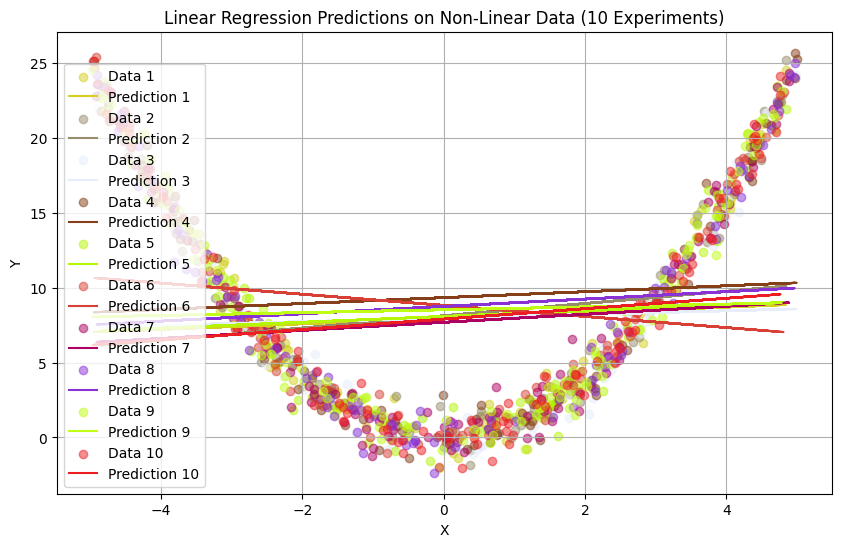

In [101]:
# Repeating the experiment 10 times and drawing predictions each time

# Set up the plot
plt.figure(figsize=(10, 6))
# Colors for the plots
colors = plt.cm.viridis(np.linspace(0, 1, 10))

K = 10
# Repeat the experiment K times
for i in range(K):
    # Fit a linear model
    X = np.random.uniform(-5, 5, 100) # Sample from Uniform distribution
    Y = X**2 + np.random.normal(0, 1, 100)  # Y is a parabola of X with added noise

    # Create DataFrame
    data = pd.DataFrame({
        'X': X,
        'Y': Y
    })

    # Reshape X for sklearn
    X_reshaped = data['X'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_reshaped, data['Y'])

    # Predictions
    data[f'Y_pred_{i}'] = model.predict(X_reshaped)
    random_color = np.random.rand(3,)

    # Plot data and predictions
    plt.scatter(data['X'], data['Y'], color=random_color, alpha=0.5, label=f'Data {i+1}')
    plt.plot(data['X'], data[f'Y_pred_{i}'], color=random_color, label=f'Prediction {i+1}')

# Additional plot settings
# plt.axvline(x=0, color='green', linestyle='-', label='X=0')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Predictions on Non-Linear Data (10 Experiments)')
plt.legend()
plt.show()

In [102]:
n_datasets = 200
predictions_x_0 = np.zeros(n_datasets)
x_0 = 0

for i in range(n_datasets):

  # Fit a linear model
    X = np.random.uniform(-5, 5, 100) # Sample from Uniform distribution
    Y = X**2 + np.random.normal(0, 1, 100)  # Y is a parabola of X with added noise

    # Create DataFrame
    data = pd.DataFrame({
        'X': X,
        'Y': Y
    })

    # Reshape X for sklearn
    X_reshaped = data['X'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_reshaped, data['Y'])

    # Predictions
    data[f'Y_pred_{i}'] = model.predict(X_reshaped)
    # Predictions
    y_pred = model.predict([[x_0]]).item()  # Predicting Y for x_0
    predictions_x_0[i] = y_pred

average_prediction = np.mean(predictions_x_0)
print(f"The average prediction at x_0=0 is: {average_prediction}")

The average prediction at x_0=0 is: 8.163002397395612


### Variance

Each time we run our simulation, that is, every time we sample a new dataset $\mathcal{D}$, our predictions changed, how can we quantify this variability?. In other words, how much does a model's predictions vary for a given data point when trained on a different data sample.

In the context of our experiment, we repeatedly trained a linear regression model on various datasets and then predicted the value of $Y$ at $x_0 = 0$, variance can be observed in the differing predictions for each dataset. These variations arise because each model, though structurally the same (linear), is trained on a different dataset. Each time, *the model adjusts itself to best fit the specific nuances of its training dataset, leading to different predictions for the same X value across models*. This is indicative of **variance**: the change in model predictions as a result of the different data it's trained on, highlighting the model's sensitivity to the specific data it encounters during training.

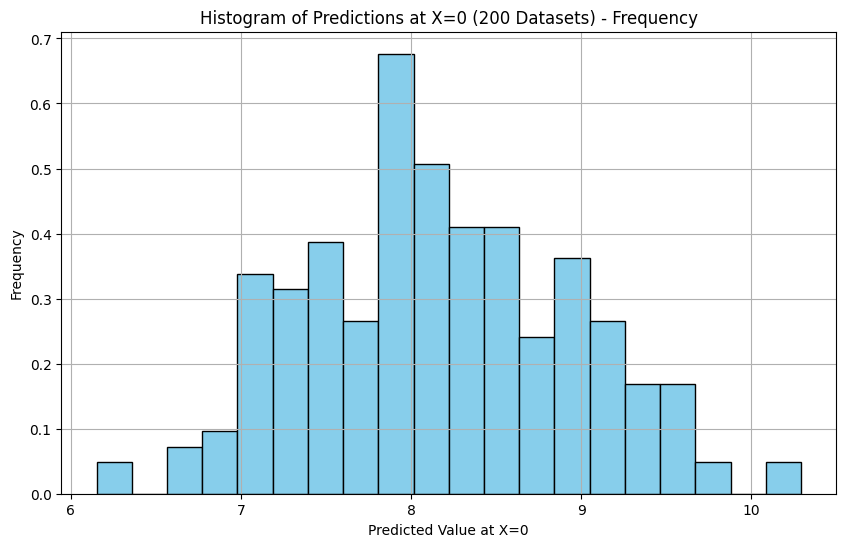

In [103]:
# Plotting the histogram of predictions
plt.figure(figsize=(10, 6))
plt.hist(predictions_x_0, bins=20, color='skyblue', edgecolor='black',  density=True)
plt.xlabel('Predicted Value at X=0')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions at X=0 (200 Datasets) - Frequency')
plt.grid(True)
plt.show()

The spread of the histogram along the x-axis indicates the variance in the model's predictions, and it reflects how sensitive the linear model is to the specifics of the data. The figure clearly illustrates that our prediction at $x_0=0$ changes significantly depending on the dataset used for training.

**A high variance can be problematic**: it implies that the model's predictions are not consistent across different datasets, so you can not trust them completely.

### Bias-variance tradeoff

Having reviewed bias and variance, it stands to reason that a **good model** should incur in *small systematic error* and produce *consistent predictions* across datasets.

 In practice, decreasing one often increases the other. A model that is flexible (low bias) tends to have high variance because it starts to model the random noise in the training data as if it were meaningful, thus not generalizing well to new data. Conversely, a simpler model (high bias) might not capture the complexities of the training data, leading to systematic errors regardless of how much data you feed it. The **tradeoff** is thus finding the right balance between simplicity (to avoid overfitting and high variance) and complexity (to avoid underfitting and high bias). This balance is key to building robust models that perform well not just on the training data but also on unseen data, which is the ultimate goal of a predictive model.

 In our next example, we will be fitting data with models of increasing complexity. In this scenario, the complexity parameter corresponds to the degree of the polynomial we use to fit our data; the higher the degree, the more patterns (or noise!) the model can express.

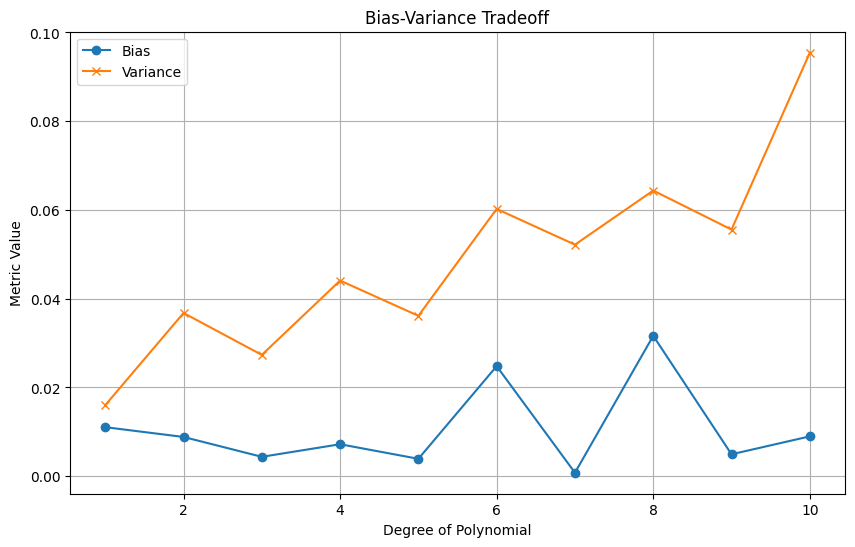

In [104]:
from sklearn.preprocessing import PolynomialFeatures


n_datasets = 200
x_0 = 0
max_degree = 10

# Arrays to store bias and variance
biases = []
variances = []

# True value at X=0
true_value = x_0**2

# Iterate over different degrees of polynomial features
for degree in range(1, max_degree + 1):
    predictions_x_0 = np.zeros(n_datasets)

    for i in range(n_datasets):
        # Generate and fit the model
        X = np.random.uniform(-5, 5, 100)
        Y = np.sin(X) + np.random.normal(0, 1, 100)

        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X.reshape(-1, 1))

        model = LinearRegression()
        model.fit(X_poly, Y)

        # Predict for x_0
        x_0_poly = poly.transform([[x_0]])
        predictions_x_0[i] = model.predict(x_0_poly)[0]

    # Calculate bias and variance
    average_prediction = np.mean(predictions_x_0)
    bias = np.abs(average_prediction - true_value)
    variance = np.var(predictions_x_0)

    biases.append(bias)
    variances.append(variance)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), biases, label='Bias', marker='o')
plt.plot(range(1, max_degree + 1), variances, label='Variance', marker='x')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Metric Value')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


### Question 1.4 (2 points)

Now, we want to calculate the bias and variance and irreducible loss components for many values of x for our demonstration. To calculate these values, we need to repeat the training procedure many times over. With the help of some lab code, run 1000 iterations of training, each with 100 training samples. Save each model to a list called ```model_list```. You must use the ```dgp``` function you developed in Part 3.

In [105]:
NUM_SAMPLES = 100
NUM_DATASETS = 1000

model_list = []

for i in range(NUM_DATASETS):
  ### IMPLEMENT HERE
  ### ADD MODEL TO model_list
  x = np.random.uniform(-5, 5, NUM_SAMPLES)
  y = dgp(x)

  X_reshaped = x.reshape(-1, 1)
  model = LinearRegression()
  model.fit(X_reshaped, y)

  model_list.append(model)


### Irreducible error

What if we model the relationship perfectly, in a way such that it will produce the same response, will we have squashed all error and have a perfect model?. The answer to this question is, unfortunately, negative; irreducible error will provide a lower bound for test prediction accuracy. This error is inherent to the data, and no matter how well we model the relationship between $X$ and $Y$, it is intrinsic to it and thus irreducible. In our working example, this error corresponds to the variability in $Y|X$ given by the standard deviation in $Y|X \sim \mathcal{N}(X^2, 1)$.

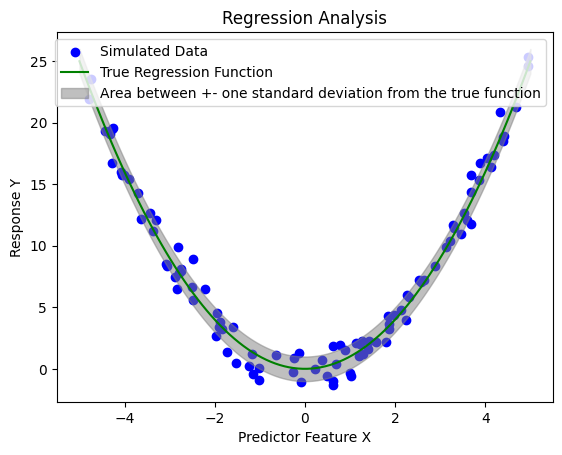

In [106]:
# Generate 100 samples of X uniformly from [0, 1]
X = np.random.uniform(-5, 5, 100) # Sample from Uniform distribution
Y = X**2 + np.random.normal(0, 1, 100)  # Y is a parabola of X with added noise

# Create DataFrame
data = pd.DataFrame({
    'X': X,
    'Y': Y
})

# Reshape X for sklearn
X_reshaped = data['X'].values.reshape(-1, 1)

# Fit a linear model
model = LinearRegression()
model.fit(X_reshaped, data['Y'])

# Predictions
data['Y_pred'] = model.predict(X_reshaped)

# Scatter plot of the simulated dataset
plt.scatter(data['X'], data['Y'], color='blue', label='Simulated Data')

# Plot the true regression function
X = np.linspace(-5, 5, 100)
true_Y = np.square(X)
plt.plot(X, true_Y, color='green', label='True Regression Function')

def f_filled(x):
    return np.square(x) + 1
def g_filled(x):
    return np.square(x) - 1

# Generate values for the filled area
X_filled = np.linspace(-5, 5, 500)
Y_filled_lower = f_filled(X_filled)
Y_filled_upper = g_filled(X_filled)
plt.fill_between(X_filled, Y_filled_lower, Y_filled_upper, color='gray', alpha=0.5, label='Area between +- one standard deviation from the true function')
# Add labels and title
plt.xlabel('Predictor Feature X')
plt.ylabel('Response Y')
plt.title('Regression Analysis')

# Show the legend
plt.legend()

# Display the plot
plt.show()

Even if our algorithm finds the true function and manages to also consistently predict it, there is inherent variability in our data that is not modeled by the relationship between $X$ and $Y$!

--------------------------------------------------------------------------------

### Question 1.5 (4 points)

Our end goal is to animate the bias, variance, and irreducible loss contributions across the inputs. To do this, we need to implement the following functions:


*   ```bias(x, signal, model_list)``` which calculates the bias at x.
*   ```variance(x, model_list)``` which calculates the variance at x.
*   ```mse(x, dgp, model_list)``` which calculates the mean squared error at x.



In [107]:
def bias(x, signal, model_list):

  ### IMPLEMENT HERE
  predictions = []

  for model in model_list:
      y_pred = model.predict([[x]])[0]
      predictions.append(y_pred)
  mean_prediction = np.mean(predictions)

  return mean_prediction - signal(x)


In [108]:
def variance(x, model_list):

  ### IMPLEMENT HERE

  predictions = []
  for model in model_list:
      y_pred = model.predict([[x]])[0]
      predictions.append(y_pred)

  return np.var(predictions)


In [109]:
def mse(x, dgp, model_list):

  ### IMPLEMENT HERE

  errors = []
  for model in model_list:
      # generate a fresh noisy sample from the DGP at x
      y_true = dgp(x)
      y_pred = model.predict([[x]])[0]
      errors.append((y_pred - y_true)**2)
  return np.mean(errors)

In [110]:
assert np.abs(mse(-5, dgp, model_list) - 282) < 50

### Part 6 (6 points)

With the help of some pre-generated code, we will create an animation that overlays an animation on the plot provided in part 3. You will need to animate the following:

1.   x moving from -5 to 5.
2.   The bias, variance, and irreducible loss calculations changing as x moves, **rounded to 2 decimal places**.

To prove you completed the task, edit the markdown cell underneath the animation with an example decomposition. We have highlighted where in the code you need to insert your implementations.

In [111]:
NUM_STEPS = 100
x = np.linspace(-5, 5, NUM_STEPS)
signal_array = np.array([signal(xi) for xi in x])
bias_array = np.array([bias(xi, signal, model_list) for xi in x])
variance_array = np.array([variance(xi, model_list) for xi in x])
mse_array = np.array([mse(xi, dgp, model_list) for xi in x])
y_predictions_array = signal_array + bias_array ### THINK ABOUT WHY THIS IS TRUE

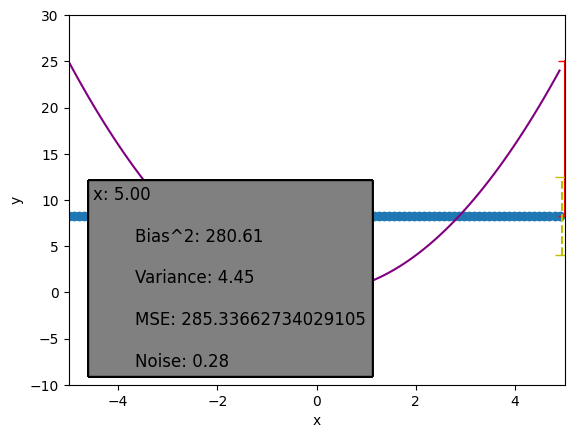

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

from matplotlib import rc
rc('animation', html='jshtml')

fig, ax = plt.subplots()

signals, = ax.plot(x[0], signal(x[0]), color='purple')
avg_predictions = ax.scatter(x[0], signal(x[0]) + bias(x[0], signal, model_list))

ax.set_xlim(-5, 5)
ax.set_ylim(-10, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Initialize the vertical line with a placeholder
bias_line, = ax.plot([], [], color='r', linestyle='-', label="Bias Line")  # Changed to a plot for dynamic updates
bias_line_marker, = ax.plot([], [], marker='_', color='r', linestyle='None', markersize=10)  # Add flat tips at the ends of the line

variance_line, = ax.plot([], [], color='y', linestyle="--", label="2SD Line")
variance_line_marker, = ax.plot([], [], marker='_', color='y', linestyle='None', markersize=10)  # Add flat tips at the ends of the line

# Update function for the animation
def update(frame):
    if frame == 0:
      return
    ### Add a new dot to the model predictions.
    new_x = x[:frame]
    new_y_avg_pred = y_predictions_array[:frame]
    # update the scatter plot
    data = np.stack([new_x, new_y_avg_pred]).T
    avg_predictions.set_offsets(data)
    # update the line plot
    signals.set_xdata(x[:frame])
    signals.set_ydata(signal(x[:frame]))

    ### Showcase the bias with a vertical line.
    # Move the vertical line
    bias_line.set_data([x[frame], x[frame]], [signal_array[frame], y_predictions_array[frame]])  # Set the line to connect signal and prediction
    bias_line_marker.set_data([x[frame], x[frame]], [signal_array[frame], y_predictions_array[frame]]) # Add flat tips at the ends of the line

    current_sd = variance_array[frame] ** 0.5

    OFFSET = 0.05 # so that the bias and variance lines don't overlay each other
    variance_line.set_data([x[frame]-OFFSET, x[frame]-OFFSET], [y_predictions_array[frame] - 2*current_sd, y_predictions_array[frame] + 2*current_sd])  # Set the line to connect signal and prediction
    variance_line_marker.set_data([x[frame]-OFFSET, x[frame]-OFFSET], [y_predictions_array[frame] - 2*current_sd, y_predictions_array[frame] + 2*current_sd]) # Add flat tips at the ends of the line

    # include a box that displays the x value, bias, variance, and mse
    status_text = ax.text(-4.5, -8, '', fontsize=12, bbox=dict(facecolor='gray', alpha=1.0))

    # Update the text box with the current values (IMPLEMENT THIS)
    current_x = x[frame]
    current_bias = bias_array[frame]
    current_variance = variance_array[frame]
    current_mse = mse_array[frame]


    # Update the text box to show metric ROUNDED to 2 DECIMAL PLACES
    status_text.set_text(
        f'''x: {current_x:.2f}\n
        Bias^2: {current_bias**2:.2f}\n
        Variance: {current_variance:.2f}\n
        MSE: {current_mse}\n
        Noise: {current_mse - current_bias ** 2 - current_variance:.2f}'''
      )

    return signals, avg_predictions, bias_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(x), interval=500, blit=False)

# View the animation
ani

(WRITE YOUR EQUATION IN MSE = Bias^2 + Variance + Noise FORMAT HERE)

285.3366 = 4.45 + 280.61 + 0.28


# **Task 2 (15 points)**

The endgoal of this Task is to implement KNN regression on data from the [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/about/index.html) (NHANES). We will select a datapoint and compute bias, variance and mse at this value for several neighbor sizes $K$.

### Question 2.1 (1 Point)

Import the datasets using `pandas`. The Canvas filepath is `Files > datasets > NHANES`. Both files should be imported.

In [ ]:
# import datasets
### IMPLEMENT HERE)

### Question 2.2 (2 Point)

Join the 3 datasets on their common observation identifier. Documentation is available for the 3 datasets.


1. [BMX_L](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BMX_L.htm)
2. [HDL_L](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HDL_L.htm)
3. [DEMO_L](https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.htm)

How many observations did you retain?

In [ ]:
# inner join on SEQN
### IMPLEMENT HERE

In [ ]:
assert df.shape[0] == 8068
assert df.shape[1] == 51

### Question 2.3 (3 Points)

We are interested in HDL concentration in mg/dL, Gender and Weight. Using the documentation, remove all observations that do not include the variable of interest. And respectively rename them `'HDL', 'Gender', 'Weight'`. Finally only keep the identifier you joined on and these 3 variables.

In [ ]:
# remove where LBDHDD, BMXWT, RIAGENDR is missing
### IMPLEMENT HERE
# rename LBDHDD, BMXWT, RIAGENDR to HDL, Gender, Weight
### IMPLEMENT HERE
# only keep SEQN and the 3 variables
### IMPLEMENT HERE

In [ ]:
assert df.shape[0] == 6822
assert df.shape[1] == 4
assert 'HDL' in df.columns
assert 'Gender' in df.columns
assert 'Weight' in df.columns
assert 'SEQN' in df.columns

### Question 2.4 (1 points)

Now use `pandas` and `random_state` to set the seed to 503 and sample a single observation from the dataset.  
This will be our fixed observation to compute bias, variance and mse.

In [ ]:
random_sample = ### IMPLEMENT HERE

In [ ]:
y_0 = random_sample['HDL']
x_0 = random_sample[['Gender', 'Weight']]

assert x_0.shape == (1, 2)
assert y_0.shape == (1,)
assert abs(y_0.item() - 42.0) < 0.1

### Question 2.5 (3 points)

Now write a function that subsamples the data at random, then performs KNN regression and returns the model.

In [ ]:
# write a function that splits the data at random, then performs KNN regression and returns the model.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

def knn_regression(x, y, k: int = 10, subsample_size: float = 0.5):
  ### IMPLEMENT HERE

In [ ]:
# test method
np.random.seed(503)
x = df[['Gender', 'Weight']]
y = df['HDL']
test_model = knn_regression(x, y)

# assert prediction is close to 44.8
assert abs(test_model.predict(x_0)[0] - 44.8) < 0.1

### Question 2.6 Setup (0 points)

Since with real world data we do not know the true signal function, we have to modify the bias, variance and mse functions to take in a test point directly. As they are rewritten, they will compute their respective quantities at a test point `(x0, y0)`.

**DO NOT MODIFY THE FUNCTIONS**

In [ ]:
def bias(x0, y0, model_list: list):
  biases = np.zeros(len(model_list))
  for i, model in enumerate(model_list):
    biases[i] = (model.predict(x0) - y0).item()
  return biases.mean()


def variance(x0, model_list: list):
  predictions = np.zeros(len(model_list))
  for i, model in enumerate(model_list):
    predictions[i] = model.predict(x0)[0]
  return predictions.var()


def mse(x0, y0, model_list: list):
  mses = np.zeros(len(model_list))
  for i, model in enumerate(model_list):
    mses[i] = (model.predict(x0) - y0).item() ** 2
  return mses.mean()

### Question 2.6 (5 points)

Now using the functions from the setup, fill out the **skeleton code**.

In [ ]:
def bias_variance_tradeoff(x, y, x_0, y_0, k_values, n_subsamples=50, subsample_size=0.5):
    """
    Computes the bias-variance tradeoff for K-Nearest Neighbors (KNN) regression at a given point x_0.

    Parameters:
        x (array-like): Feature matrix of shape (n_samples, n_features).
        y (array-like): Target values of shape (n_samples,).
        x_0 (array-like): A specific input point where bias-variance tradeoff is evaluated, shape (n_features,).
        y_0 (float): The true target value at x_0.
        k_values (list): A list of integers specifying the different values of k (number of neighbors) to evaluate.
        n_subsamples (int, optional): Number of subsampled datasets to train models on. Default is 50.
        subsample_size (float, optional): Fraction of the original dataset to be used for each subsample (0 to 1). Default is 0.5.

    Returns:
        results: np.ndarray, (len(k_values), 3) matrix where:
            - Column 1: Estimated bias squared (E[f(x_0)] - y_0)^2.
            - Column 2: Estimated variance of f(x_0).
            - Column 3: Mean squared error (bias squared + variance + irreducible error).
    """
    # initialize matrix of results
    results =

    # For each value of k
    for i, k in enumerate(k_values):
        # Initialize model list
        models =
        # Generate subsamples and fit models
        for _ in range(n_subsamples):
            # Train KNN model on a subsample of the data
            model =
            # Append model to list


        # Compute bias, variance, and mean squared error at (x_0, y_0)
        b =
        var =
        m =

        # Store results in the matrix
        results[i] =

    return results

**Do not mofidfy the next cell.**

In [ ]:
# DO NOT MODIFY
k_values = [2, 5, 10, 15, 20, 30]
results = bias_variance_tradeoff(x, y, x_0, y_0, k_values, n_subsamples=50)

# plot smoothed results by using a spline
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# smooth all columns
n_points = 100
x_range = np.linspace(min(k_values), max(k_values), n_points)
smooth_results = np.zeros((n_points, results.shape[1]))
for i in range(results.shape[1]):
  # interpolate with spline
  smooth_results[:, i] = interpolate.UnivariateSpline(k_values, results[:, i], k=3, s=0)(x_range)

# plot smoothed results
plt.plot(x_range, smooth_results[:, 0]**2, linestyle='--')
plt.plot(x_range, smooth_results[:, 1], linestyle='--')
plt.plot(x_range, smooth_results[:, 2])
# plot original values as points
plt.scatter(k_values, results[:, 0]**2, label='Bias', marker='s')
plt.scatter(k_values, results[:, 1], label='Variance', marker='x')
plt.scatter(k_values, results[:, 2], label='MSE', marker='o')
plt.xlabel('K Neighbors')
plt.ylabel('Value')
plt.legend()
plt.title('Bias, Variance, and MSE vs. K Neighbors')
# add dashed grid
plt.grid(linestyle='--', linewidth=0.5)
plt.show()